Identify the key reasons for the declining population by extracting meaningful insights from unstructured text

Provide actionable recommendations on what can be done to reverse this trend

In [1]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [2]:
fileName = 'C:\\Users\\zjx04\\Jupython_WD\\NLP\\news_chicago_il\\news_chicago_il.json'

In [3]:
file = open(fileName, 'r', encoding='utf-8')
data = []
for line in file.readlines():
    dic = json.loads(line)
    data.append(dic)

In [4]:
data[0:5]

In [5]:
df = pd.DataFrame.from_records(data)

In [6]:
df.to_csv('data.csv', index=False)

In [2]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,crawled_date,language,text,title
0,1589155200000,english,\nGov. Jay “Fatso” Pritzker called on all Illi...,All In Illinois
1,1589155200000,english,"May 10, 2020 -The Illinois Department of Publi...",The Illinois Department of Public Health Annou...
2,1589155200000,english,"Gloria Lawrence said: May 10, 2020 at 1:31 AM\...","Foto Friday: Alton, Illinois"
3,1589155200000,english,NBA to follow German soccer league model with ...,Chris Broussard on Michael Jordan returning to...
4,1589155200000,english,"Search Minggu, 10 Mei 2020 Pork chops vs. peop...",Pork chops vs. people: Can Americans’ appetite...


In [9]:
df = df[df['language'] == 'english']

In [3]:
df.shape

(371788, 4)

In [4]:
# Identify what news are mentioned along with population (in either title or text)
# Eliminate articles irrelevant to the analysis

df1 = df[df['text'].str.contains('population') | df['text'].str.contains('Population') | df['text'].str.contains('POPULATION') | 
        df['title'].str.contains('population') | df['title'].str.contains('Population') | df['title'].str.contains('POPULATION')]

In [12]:
pd.set_option('display.max_colwidth', 200)

In [13]:
df1.head()

,crawled_date,language,text,title
61,1589155200000,english,"Mayor Lightfoot announces plans for reopening Chicago By Reel Chicago May 11, 2020 0 Mayor Lori E. Lightfoot , alongside the Chicago Department of Public Health (CDPH), announced the “Protecting C...",Mayor Lightfoot announces plans for reopening Chicago
94,1589155200000,english,"New Adult-Use Customers Can Only Shop Online or Over-the-Phone for In-Store Pickup Medical Patients Can Shop In-Store, Online or Over-the-Phone for Convenient Curbside or In-Store Pickup BOCA RATO...","Jushi Announces the Beginning of Adult-Use Cannabis Sales at its Illinois Dispensary in Normal, Illinois"
96,1589155200000,english,"New Adult-Use Customers Can Only Shop Online or Over-the-Phone for In-Store Pickup\nMedical Patients Can Shop In-Store, Online or Over-the-Phone for Convenient Curbside or In-Store Pickup\nBOCA RA...","Jushi Announces the Beginning of Adult-Use Cannabis Sales at its Illinois Dispensary in Normal, Illinois"
111,1589155200000,english,"Pope Francis Names Father Louis Tylka of Archdiocese of Chicago as Coadjutor Bishop of Peoria May 11, 2020\nWASHINGTON—Pope Francis has named Father Louis Tylka, a priest of the Archdiocese of Chi...",Pope Francis Names Father Louis Tylka of Archdiocese of Chicago as Coadjutor Bishop of Peoria
138,1589155200000,english,"As the coronavirus spreads, the Tribune is tracking Illinois cases here »\nHere’s what’s happening Monday with COVID-19 in the Chicago area and Illinois: 5:46 p.m.: Church leaders push back on Lig...",Coronavirus in Illinois updates: Here’s what’s happening Monday with COVID-19 in the Chicago area


In [5]:
df1.shape

(9635, 4)

In [6]:
# Clean-up the noise (eliminate useless characters)

df1['text_clean'] = df1['text'].map(lambda x: re.sub('[^a-zA-Z0-9 . , ]', '', str(x)))

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop]) #lower case
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude) #remove punctuations
    number_free = ''.join(word for word in punc_free if not word.isnumeric()) #remove numbers
    normalized = " ".join(lemma.lemmatize(word) for word in number_free.split()) #lemmatize words
    return normalized

df1['text_clean']  = df1['text_clean'].apply(lambda x: clean(x))  

C:\Users\zjx04\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zjx04\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [7]:
df1['title_clean'] = df1['title'].map(lambda x: re.sub('[^a-zA-Z0-9 . , ]', '', str(x)))

df1['title_clean']  = df1['title_clean'].apply(lambda x: clean(x))  

C:\Users\zjx04\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zjx04\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# tokenize text and title

token1 = df1['text_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))
token2 = df1['title_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [18]:
token1

61        [mayor, lightfoot, announces, plan, reopening, chicago, reel, chicago, may, mayor, lori, e, lightfoot, alongside, chicago, department, public, health, cdph, announced, protecting, chicago, framewo...
94        [new, adultuse, customer, shop, online, overthephone, instore, pickup, medical, patient, shop, instore, online, overthephone, convenient, curbside, instore, pickup, boca, raton, fla, may, globe, n...
96        [new, adultuse, customer, shop, online, overthephone, instore, pickupmedical, patient, shop, instore, online, overthephone, convenient, curbside, instore, pickupboca, raton, fla, may, globe, newsw...
111       [pope, francis, name, father, louis, tylka, archdiocese, chicago, coadjutor, bishop, peoria, may, washingtonpope, francis, named, father, louis, tylka, priest, archdiocese, chicago, coadjutor, bis...
138       [coronavirus, spread, tribune, tracking, illinois, case, here, whats, happening, monday, covid, chicago, area, illinois, pm, church, leader, push, bac

In [19]:
token2

61                                                                                                                                                        [mayor, lightfoot, announces, plan, reopening, chicago]
94                                                                                                                [jushi, announces, beginning, adultuse, cannabis, sale, illinois, dispensary, normal, illinois]
96                                                                                                                [jushi, announces, beginning, adultuse, cannabis, sale, illinois, dispensary, normal, illinois]
111                                                                                                                  [pope, francis, name, father, louis, tylka, archdiocese, chicago, coadjutor, bishop, peoria]
138                                                                                                                         [coronavirus, illinois, update, here

In [9]:
fdist1 = list(map(lambda x: nltk.FreqDist(x), token1))
fdist1[0:5]

[FreqDist({'city': 17, 'covid': 14, 'reopening': 13, 'chicago': 13, 'phase': 12, 'work': 10, 'mayor': 9, 'public': 9, 'health': 9, 'lightfoot': 8, ...}),
 FreqDist({'information': 23, 'forwardlooking': 21, 'statement': 21, 'company': 12, 'may': 9, 'jushi': 9, 'instore': 8, 'illinois': 7, 'beyond': 7, 'hello': 7, ...}),
 FreqDist({'information': 23, 'forwardlooking': 21, 'statement': 20, 'company': 12, 'may': 9, 'jushi': 9, 'instore': 8, 'illinois': 7, 'hello': 7, 'customer': 6, ...}),
 FreqDist({'tylka': 7, 'bishop': 7, 'father': 6, 'chicago': 6, 'archdiocese': 4, 'peoria': 4, 'may': 4, 'pastor': 4, 'francis': 3, 'louis': 3, ...}),
 FreqDist({'said': 30, 'illinois': 26, 'chicago': 24, 'state': 20, 'monday': 19, 'covid': 17, 'pritzker': 17, 'read': 17, 'test': 17, 'coronavirus': 16, ...})]

In [10]:
fdist2 = list(map(lambda x: nltk.FreqDist(x), token2))
fdist2[0:5]

[FreqDist({'mayor': 1, 'lightfoot': 1, 'announces': 1, 'plan': 1, 'reopening': 1, 'chicago': 1}),
 FreqDist({'illinois': 2, 'jushi': 1, 'announces': 1, 'beginning': 1, 'adultuse': 1, 'cannabis': 1, 'sale': 1, 'dispensary': 1, 'normal': 1}),
 FreqDist({'illinois': 2, 'jushi': 1, 'announces': 1, 'beginning': 1, 'adultuse': 1, 'cannabis': 1, 'sale': 1, 'dispensary': 1, 'normal': 1}),
 FreqDist({'pope': 1, 'francis': 1, 'name': 1, 'father': 1, 'louis': 1, 'tylka': 1, 'archdiocese': 1, 'chicago': 1, 'coadjutor': 1, 'bishop': 1, ...}),
 FreqDist({'coronavirus': 1, 'illinois': 1, 'update': 1, 'here': 1, 'whats': 1, 'happening': 1, 'monday': 1, 'covid': 1, 'chicago': 1, 'area': 1})]

In [11]:
# get frequency of keywords from text and title

record1 = []
for i in range(len(fdist1)):
    if 'covid' not in fdist1[i].keys() and ('decline' in fdist1[i].keys() or 'loss' in fdist1[i].keys()):
        record1.append(i)
        print(i)
        print(fdist1[i].most_common(10))

39
[('tax', 37), ('income', 26), ('illinois', 23), ('amendment', 19), ('state', 18), ('would', 15), ('rate', 13), ('said', 10), ('million', 10), ('group', 10)]
40
[('tax', 14), ('business', 13), ('small', 8), ('job', 7), ('state', 7), ('amendment', 6), ('even', 6), ('provide', 4), ('people', 4), ('like', 4)]
43
[('tax', 38), ('income', 27), ('illinois', 20), ('amendment', 18), ('state', 16), ('would', 15), ('rate', 13), ('said', 10), ('group', 10), ('voter', 9)]
45
[('tax', 16), ('business', 13), ('job', 8), ('small', 8), ('even', 7), ('state', 7), ('amendment', 6), ('illinois', 5), ('plumbing', 4), ('company', 4)]
53
[('population', 9), ('county', 9), ('time', 4), ('state', 4), ('according', 3), ('loss', 3), ('illinois', 3), ('wirepoints', 3), ('resident', 3), ('period', 3)]
56
[('homicide', 10), ('chicago', 8), ('skogan', 7), ('said', 7), ('year', 6), ('crime', 6), ('percent', 5), ('violence', 5), ('spike', 5), ('police', 5)]
59
[('home', 14), ('price', 14), ('chicago', 9), ('percent

[('pension', 40), ('city', 28), ('said', 23), ('tax', 20), ('property', 14), ('service', 12), ('illinois', 12), ('fund', 11), ('police', 10), ('public', 9)]
6854
[('center', 2), ('square', 2), ('june', 1), ('amthe', 1), ('danville', 1), ('experienced', 1), ('highest', 1), ('net', 1), ('migration', 1), ('decline', 1)]
6856
[('center', 1), ('square', 1), ('danville', 1), ('experienced', 1), ('highest', 1), ('net', 1), ('migration', 1), ('decline', 1), ('percent', 1), ('among', 1)]
6859
[('city', 6), ('migration', 6), ('net', 5), ('population', 5), ('wall', 4), ('danville', 3), ('decline', 3), ('percent', 3), ('metro', 3), ('area', 3)]
6867
[('cahokia', 3), ('centreville', 2), ('alorton', 2), ('merger', 2), ('community', 2), ('one', 2), ('city', 2), ('illinois', 1), ('vote', 1), ('deasia', 1)]
6876
[('illinois', 20), ('state', 9), ('new', 8), ('people', 5), ('population', 5), ('leaving', 5), ('data', 5), ('lost', 4), ('illinoisan', 4), ('fleeing', 4)]
6886
[('city', 11), ('india', 7), ('s

In [12]:
record2 = []
for i in range(len(fdist2)):
    if 'covid' not in fdist2[i].keys() and ('decline' in fdist2[i].keys() or 'loss' in fdist2[i].keys()):
        record2.append(i)
        print(i)
        print(fdist2[i].most_common(5))

126
[('stung', 1), ('loss', 1), ('progressive', 1), ('woman', 1), ('aim', 1)]
127
[('stung', 1), ('loss', 1), ('progressive', 1), ('woman', 1), ('aim', 1)]
128
[('stung', 1), ('loss', 1), ('progressive', 1), ('woman', 1), ('aim', 1)]
139
[('stung', 1), ('loss', 1), ('progressive', 1), ('woman', 1), ('aim', 1)]
140
[('stung', 1), ('loss', 1), ('progressive', 1), ('woman', 1), ('aim', 1)]
457
[('populartion', 1), ('loss', 1), ('illinois', 1), ('hamilton', 1), ('countymcleansboro', 1)]
651
[('chicago', 1), ('population', 1), ('decline', 1), ('traffic', 1), ('give', 1)]
851
[('university', 1), ('illinois', 1), ('research', 1), ('decline', 1), ('bird', 1)]
1008
[('cable', 1), ('tv', 1), ('subscriber', 1), ('loss', 1), ('could', 1)]
1013
[('cable', 1), ('tv', 1), ('subscriber', 1), ('loss', 1), ('could', 1)]
1014
[('cable', 1), ('tv', 1), ('subscriber', 1), ('loss', 1), ('could', 1)]
1016
[('cable', 1), ('tv', 1), ('subscriber', 1), ('loss', 1), ('could', 1)]
1017
[('cable', 1), ('tv', 1), (

In [13]:
len(record1), len(record2)

(874, 121)

In [14]:
# ngrams 4 words for text (select 4 because if 5 all combinations will only appear once)

fgs = list(map(lambda x: nltk.ngrams(str(x).split(), 4), token1))

In [15]:
fdist_4 = list(map(lambda x: nltk.FreqDist(x), fgs))

In [16]:
for i in set(record1).intersection(set(record2)):
    print(i)
    print(fdist_4[i].most_common(15))

1527
[(("['register',", "'free',", "'article',", "'stay',"), 1), (("'free',", "'article',", "'stay',", "'logged',"), 1), (("'article',", "'stay',", "'logged',", "'skip',"), 1), (("'stay',", "'logged',", "'skip',", "'survey',"), 1), (("'logged',", "'skip',", "'survey',", "'log',"), 1), (("'skip',", "'survey',", "'log',", "'sign',"), 1), (("'survey',", "'log',", "'sign',", "'featuredbuttontextthe',"), 1), (("'log',", "'sign',", "'featuredbuttontextthe',", "'tribune',"), 1), (("'sign',", "'featuredbuttontextthe',", "'tribune',", "'report',"), 1), (("'featuredbuttontextthe',", "'tribune',", "'report',", "'asked',"), 1), (("'tribune',", "'report',", "'asked',", "'administration',"), 1), (("'report',", "'asked',", "'administration',", "'gov',"), 1), (("'asked',", "'administration',", "'gov',", "'jb',"), 1), (("'administration',", "'gov',", "'jb',", "'pritzker',"), 1), (("'gov',", "'jb',", "'pritzker',", "'comment',"), 1)]
9220
[(("'pulaski',", "'county',", "'illinois',", "'u',"), 2), (("['st

In [28]:
for i in record2:
    print(i)
    print(fdist_4[i].most_common(15))

126
[(("['stung',", "'loss',", "'progressive',", "'woman',"), 1), (("'loss',", "'progressive',", "'woman',", "'aim',"), 1), (("'progressive',", "'woman',", "'aim',", "'win',"), 1), (("'woman',", "'aim',", "'win',", "'illinois',"), 1), (("'aim',", "'win',", "'illinois',", "'sara',"), 1), (("'win',", "'illinois',", "'sara',", "'burnett',"), 1), (("'illinois',", "'sara',", "'burnett',", "'associated',"), 1), (("'sara',", "'burnett',", "'associated',", "'press',"), 1), (("'burnett',", "'associated',", "'press',", "'friday',"), 1), (("'associated',", "'press',", "'friday',", "'mar',"), 1), (("'press',", "'friday',", "'mar',", "'pm',"), 1), (("'friday',", "'mar',", "'pm',", "'mar',"), 1), (("'mar',", "'pm',", "'mar',", "'pmchicago',"), 1), (("'pm',", "'mar',", "'pmchicago',", "'ap',"), 1), (("'mar',", "'pmchicago',", "'ap',", "'thing',"), 1)]
127
[(("['stung',", "'loss',", "'progressive',", "'woman',"), 1), (("'loss',", "'progressive',", "'woman',", "'aim',"), 1), (("'progressive',", "'woman

[(("['illini',", "'fan',", "'player',", "'coach',"), 1), (("'fan',", "'player',", "'coach',", "'would',"), 1), (("'player',", "'coach',", "'would',", "'right',"), 1), (("'coach',", "'would',", "'right',", "'say',"), 1), (("'would',", "'right',", "'say',", "'team',"), 1), (("'right',", "'say',", "'team',", "'moved',"), 1), (("'say',", "'team',", "'moved',", "'positive',"), 1), (("'team',", "'moved',", "'positive',", "'direction',"), 1), (("'moved',", "'positive',", "'direction',", "'season',"), 1), (("'positive',", "'direction',", "'season',", "'cal',"), 1), (("'direction',", "'season',", "'cal',", "'made',"), 1), (("'season',", "'cal',", "'made',", "'outmatched',"), 1), (("'cal',", "'made',", "'outmatched',", "'illini',"), 1), (("'made',", "'outmatched',", "'illini',", "'look',"), 1), (("'outmatched',", "'illini',", "'look',", "'like',"), 1)]
4886
[(("['cover',", "'waterfront',", "'recommended',", "'reading',"), 1), (("'waterfront',", "'recommended',", "'reading',", "'link',"), 1), (("

In [17]:
# target ngrams 3 words

tgs = list(map(lambda x: [b for b in nltk.trigrams(x) if b[0] == 'decline' or b[1] == 'decline' or 
                          b[2] == 'decline'], token1))

In [18]:
fdist_3 = list(map(lambda x: nltk.FreqDist(x), tgs))
len(fdist_3)

9635

In [19]:
for i in set(record1).intersection(set(record2)):
    if len(fdist_3[i]) != 0:
        print(pd.DataFrame(fdist_3[i].most_common(10)))
        print(i)

                                 0  1
0  (contrast, population, decline)  1
1  (population, decline, illinois)  1
2     (decline, illinois, chicago)  1
6151
                                        0  1
0                (the, dramatic, decline)  1
1                (dramatic, decline, led)  1
2                 (decline, led, ongoing)  1
3            (black, population, decline)  1
4  (population, decline, includechicagos)  1
5  (decline, includechicagos, population)  1
7690
                                    0  1
0    (illinois, experienced, decline)  1
1  (experienced, decline, population)  1
2      (decline, population, however)  1
3         (hill, population, decline)  1
4      (population, decline, harmful)  1
5        (decline, harmful, illinois)  1
6        (important, discus, decline)  1
7       (discus, decline, population)  1
8       (decline, population, within)  1
9              (see, bigger, decline)  1
7708
                              0  1
0    (raw, population, decline) 

In [20]:
tgs2 = list(map(lambda x: [b for b in nltk.trigrams(x) if b[0] == 'loss' and b[1] == 'loss' or 
                           b[2] == 'loss'], token1))

In [21]:
fdist2_3 = list(map(lambda x: nltk.FreqDist(x), tgs2))

In [22]:
for i in set(record1).intersection(set(record2)):
    if len(fdist2_3[i]) != 0:
        print(pd.DataFrame(fdist2_3[i].most_common(10)))
        print(i)

                             0  1
0          (shown, much, loss)  1
1  (leaving, statesthat, loss)  1
1527
                                 0  1
0      (started, population, loss)  1
1       (county, population, loss)  1
2     (illinois, population, loss)  1
3  (countycairo, population, loss)  1
9220
                              0  1
0   (started, population, loss)  1
1    (county, population, loss)  1
2  (illinois, population, loss)  1
3      (city, population, loss)  1
9221
                                    0  1
0         (started, population, loss)  1
1          (county, population, loss)  1
2        (illinois, population, loss)  1
3  (countygolconda, population, loss)  1
9224
                                   0  1
0          (black, population, loss)  1
1  (corresponded, significant, loss)  1
2            (policy, reverse, loss)  1
7690
                            0  1
0  (county, population, loss)  1
1         (data, track, loss)  1
8222
                                       

In [23]:
# find and record row index of articles related to keywords

record3 = []
for i in record1:
    if len(fdist2_3[i]) != 0 or len(fdist_3[i]) != 0:
        print(i)
        record3.append(i)

39
40
43
45
53
56
59
67
69
70
71
72
73
74
75
115
128
139
169
172
208
215
227
229
232
263
330
336
343
363
377
444
446
448
449
450
452
454
457
493
520
527
531
567
569
576
581
616
647
651
652
665
666
670
688
694
711
717
718
720
721
742
753
772
773
801
812
826
829
851
858
859
861
865
867
924
926
927
928
929
967
988
994
995
1008
1014
1016
1017
1027
1044
1054
1079
1080
1084
1090
1092
1094
1133
1138
1154
1186
1196
1197
1218
1228
1242
1246
1255
1277
1334
1354
1496
1499
1503
1509
1518
1519
1520
1521
1522
1523
1525
1527
1545
1546
1547
1548
1551
1553
1558
1563
1599
1604
1646
1647
1649
1656
1659
1667
1668
1675
1693
1694
1697
1717
1726
1743
1746
1767
1785
1816
1852
1894
1900
1903
1905
1909
1911
1913
1915
1917
1921
1922
1927
1928
1929
1934
1945
1949
1971
1972
1977
1984
1993
2003
2005
2015
2025
2031
2032
2038
2039
2040
2063
2089
2091
2106
2126
2127
2141
2143
2147
2150
2241
2245
2252
2261
2267
2319
2329
2368
2380
2382
2393
2396
2398
2400
2405
2428
2463
2469
2490
2494
2497
2521
2529
2540
2543
2602
2661

In [24]:
len(record3)

867

In [25]:
record4 = []
for i in set(record1).intersection(set(record2)):
    if len(fdist2_3[i]) != 0 or len(fdist_3[i]) != 0:
        print(i)
        record4.append(i)

1527
9220
9221
6151
9224
7690
7708
8222
9251
9264
3123
8764
1604
8802
5742
8815
6775
128
139
651
7821
1726
9425
3300
4886
6942
6944
4898
5924
2859
4401
7985
4406
7993
4412
4419
851
2405
1894
5485
1921
6533
1934
3983
2974
2463
2978
2469
4005
2984
4520
2986
4521
4522
2989
2990
4527
6583
8126
2497
4548
457
5586
6624
4577
4580
6633
6635
4589
4590
1008
2032
1522
6643
1014
9207
1016
1017
2038
4603
4598
4605


In [26]:
len(record4)

82

In [27]:
df2 = df1.reset_index()
df2.head()

,index,crawled_date,language,text,title,text_clean,title_clean
0,61,1589155200000,english,Mayor Lightfoot announces plans for reopening ...,Mayor Lightfoot announces plans for reopening ...,mayor lightfoot announces plan reopening chica...,mayor lightfoot announces plan reopening chicago
1,94,1589155200000,english,New Adult-Use Customers Can Only Shop Online o...,Jushi Announces the Beginning of Adult-Use Can...,new adultuse customer shop online overthephone...,jushi announces beginning adultuse cannabis sa...
2,96,1589155200000,english,New Adult-Use Customers Can Only Shop Online o...,Jushi Announces the Beginning of Adult-Use Can...,new adultuse customer shop online overthephone...,jushi announces beginning adultuse cannabis sa...
3,111,1589155200000,english,Pope Francis Names Father Louis Tylka of Archd...,Pope Francis Names Father Louis Tylka of Archd...,pope francis name father louis tylka archdioce...,pope francis name father louis tylka archdioce...
4,138,1589155200000,english,"As the coronavirus spreads, the Tribune is tra...",Coronavirus in Illinois updates: Here’s what’s...,coronavirus spread tribune tracking illinois c...,coronavirus illinois update here whats happeni...


In [28]:
df2.shape

(9635, 7)

In [39]:
df2[df2.index == 40]

,index,crawled_date,language,text,title,text_clean,title_clean
40,1049,1600473600000,english,Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plu...,Graduated income tax for Illinois threatens small business owners like me – Chicago Sun-Times,small business heart neighborhood job created small business keep community thriving name chris plywacz proud owner reeg plumbing small business western suburb im millionaire billionaire far it se...,graduated income tax illinois threatens small business owner like chicago suntimes


In [40]:
# manually read the text to validate selection

df2[df2.index==40]['text'].values

array(['Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plumbing , a small business in the western suburbs. I’m not a millionaire, nor am I a billionaire. Far from it. SEND LETTERS TO: . Please include your neighborhood or hometown and a phone number for verification purposes. I started my career right after high school, entering the trades. I eventually was able to purchase the company I worked for with the help of the Obama Administration’s Small Business Administration loan program. I am very proud that I have grown this company and now help provide jobs for other people just like me. My employees work hard. They know they have good-paying jobs, and they provide safety and security for their families. I am very concerned about the graduated income tax amendment on the ballot on Nov. 3 and the potential negative effect on my business and emp

In [41]:
df2[df2.index == 45]['text'].values

array(['I will be paying more for the products I need for my plumbing company. I don’t want to be forced to make up the difference by cutting wages or even jobs. Sep 18, 2020, 4:01pm CDT Share this story Gov. J.B. Pritzker is pushing a proposed constitutional amendement on the Nov. 3 that would allow a graduated income tax, rather than a flat tax, in Illinois. AP Photos Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plumbing , a small business in the western suburbs. I’m not a millionaire, nor am I a billionaire. Far from it. SEND LETTERS TO: . Please include your neighborhood or hometown and a phone number for verification purposes. I started my career right after high school, entering the trades. I eventually was able to purchase the company I worked for with the help of the Obama Administration’s Small Business Administration loan program.

In [29]:
df3 = df2[df2.index.isin(record3)]

In [30]:
df3.shape

(867, 7)

In [44]:
df3.head(10)

# Here I can assume df3 should contain most articles related to population decline

,index,crawled_date,language,text,title,text_clean,title_clean
39,950,1600473600000,english,"Illinois Governor JB Pritzker speaks at the Illinois State Capitol on May 20, 2020, in Springfield, Illinois. (Erin Hooley/Chicago Tribune)\nBefore Illinois voters consider any candidate on the No...",Fair tax or tax hike? Illinois voters decide on big taxation shift.,illinois governor jb pritzker speaks illinois state capitol may springfield illinois erin hooleychicago tribunebefore illinois voter consider candidate nov ballot presidential contender member con...,fair tax tax hike illinois voter decide big taxation shift
40,1049,1600473600000,english,Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plu...,Graduated income tax for Illinois threatens small business owners like me – Chicago Sun-Times,small business heart neighborhood job created small business keep community thriving name chris plywacz proud owner reeg plumbing small business western suburb im millionaire billionaire far it se...,graduated income tax illinois threatens small business owner like chicago suntimes
43,1230,1600473600000,english,"Sept. 18-- CHICAGO-Before Illinois voters consider any candidate on the Nov. 3 ballot-the presidential contenders, a member of Congress, a state lawmaker or a local judge-they will be asked to cas...",Fair tax or tax hike? Voters set to decide what could be Illinois' biggest taxation shift in decades,sept chicagobefore illinois voter consider candidate nov ballotthe presidential contender member congress state lawmaker local judgethey asked cast simple yes vote could become biggest change stat...,fair tax tax hike voter set decide could illinois biggest taxation shift decade
45,1442,1600560000000,english,"I will be paying more for the products I need for my plumbing company. I don’t want to be forced to make up the difference by cutting wages or even jobs. Sep 18, 2020, 4:01pm CDT Share this story ...",Letter: Graduated income tax for Illinois threatens small business owners like me – Chicago Sun-Times*,paying product need plumbing company dont want forced make difference cutting wage even job sep pm cdt share story gov jb pritzker pushing proposed constitutional amendement nov would allow gradua...,letter graduated income tax illinois threatens small business owner like chicago suntimes
53,2068,1578873600000,english,"Sangamon saw its population decrease by 2,419, or 1.2 percent, over the last decade, according to a new analysis from Wirepoints.org that is based on U.S. Census Bureau data.\nSangamon recorded th...",Sangamon among 93 Illinois counties with declining populations,sangamon saw population decrease percent last decade according new analysis wirepointsorg based u census bureau datasangamon recorded nd largest loss among illinois county year wirepoints reported...,sangamon among illinois county declining population
56,2436,1580256000000,english,"The number of people killed in Chicago dropped from 567 in 2018 to 492 in 2019, marking a 13 percent decrease and the third year in a row where homicides have declined in Chicago.\nThe drop in hom...",Chicago homicide rate decreases for 3rd straight year,number people killed chicago dropped marking percent decrease third year row homicide declined chicagothe drop homicide follows one chicago deadliest year record city saw murder shooting incident ...,chicago homicide rate decrease rd straight year
59,2522,1580256000000,english,"Home price growth stalled last fall in the Chicago area.\nThe region’s single-family home values grew by 0.4 percent in November from a year earlier, according to the S&P CoreLogic Case-Shiller In...","Chicago home price growth flat, S&P CoreLogic Case-Shiller Indices show - Crain's Chicago Business",home price growth stalled last fall chicago areathe region singlefamily home value grew percent november year earlier ac

In [31]:
df4 = df2[df2.index.isin(record4)]
df4.shape

(82, 7)

In [32]:
df4.head()

# Here I can assume all articles in df4 is about population decline but may loss some other information

,index,crawled_date,language,text,title,text_clean,title_clean
128,4457,1584144000000,english,"In this Monday, March 9, 2020, photo, Marie Ne...","Stung by losses, progressive women aim for a w...",monday march photo marie newman smile campaign...,stung loss progressive woman aim win illinois
139,4551,1584144000000,english,"Stung by losses, progressive women aim for a w...","Stung by losses, progressive women aim for a w...",stung loss progressive woman aim win illinois ...,stung loss progressive woman aim win illinois ...
457,18900,1573948800000,english,\nIt all started here .\nPopulation loss as in...,Populartion loss in Illinois: Hamilton County/...,started population loss major moresource wikip...,populartion loss illinois hamilton countymclea...
651,25625,1583366400000,english,"Even as Illinois sees its population decline, ...","Chicago Population Declines, But Traffic Is Up...",even illinois see population decline study uni...,chicago population decline traffic give audio ...
851,34100,1599091200000,english,"URBANA, Ill. — Bird biodiversity is rapidly de...",University of Illinois research: Decline in bi...,urbana ill bird biodiversity rapidly declining...,university illinois research decline bird numb...


In [33]:
# Detect major topics - TFIDF

from textblob import TextBlob
import math
bloblist = []

for i in range(0,len(df3)):
    bloblist.append(TextBlob(df3['text_clean'].iloc[i]))

len(bloblist)

867

In [34]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [35]:
for i, blob in enumerate(bloblist):
    if i == 5:
        break
    print("Top words in text {}".format(i+1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in text 1
	Word: amendment, TF-IDF: 0.04246
	Word: income, TF-IDF: 0.03627
	Word: tax, TF-IDF: 0.03138
	Word: graduatedrate, TF-IDF: 0.03056
	Word: fairness, TF-IDF: 0.0196
Top words in text 2
	Word: plumbing, TF-IDF: 0.05139
	Word: amendment, TF-IDF: 0.04864
	Word: business, TF-IDF: 0.04463
	Word: tax, TF-IDF: 0.04307
	Word: plywacz, TF-IDF: 0.03609
Top words in text 3
	Word: amendment, TF-IDF: 0.04169
	Word: income, TF-IDF: 0.03904
	Word: tax, TF-IDF: 0.0334
	Word: graduatedrate, TF-IDF: 0.03168
	Word: fairness, TF-IDF: 0.02031
Top words in text 4
	Word: plumbing, TF-IDF: 0.06112
	Word: tax, TF-IDF: 0.04391
	Word: amendment, TF-IDF: 0.04339
	Word: business, TF-IDF: 0.03981
	Word: plywacz, TF-IDF: 0.0322
Top words in text 5
	Word: county, TF-IDF: 0.07897
	Word: wirepoints, TF-IDF: 0.07711
	Word: collar, TF-IDF: 0.05449
	Word: datasangamon, TF-IDF: 0.04819
	Word: recorded, TF-IDF: 0.04239


In [38]:
entities = []
labels = []

for i, blob in enumerate(bloblist):
    if i == 10:
        break
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        entities.append(word)
        labels.append(round(score,5))

entities_all = list(zip(entities, labels))
pd.DataFrame(entities_all)

,0,1
0,amendment,0.04246
1,income,0.03627
2,tax,0.03138
3,plumbing,0.05139
4,amendment,0.04864
5,business,0.04463
6,amendment,0.04169
7,income,0.03904
8,tax,0.03340
9,plumbing,0.06112


In [39]:
entities_dic = dict(zip(entities, labels))
entities_dic

{'amendment': 0.04339,
 'income': 0.03904,
 'tax': 0.04391,
 'plumbing': 0.06112,
 'business': 0.04463,
 'county': 0.07897,
 'wirepoints': 0.07711,
 'collar': 0.05449,
 'skogan': 0.14424,
 'homicide': 0.12232,
 'spike': 0.06448,
 'index': 0.08945,
 'price': 0.08653,
 'home': 0.04517,
 'ogden': 0.13815,
 'bus': 0.09165,
 'lawndale': 0.07688,
 'contribution': 0.06088,
 'target': 0.04166,
 'chart': 0.04009,
 'assumption': 0.03714}

In [41]:
entities_str = " ".join(entities)
entities_str

'amendment income tax plumbing amendment business amendment income tax plumbing tax amendment county wirepoints collar skogan homicide spike index price home ogden bus lawndale contribution target chart contribution target assumption'

In [40]:
import wordcloud
from matplotlib import pyplot as plt

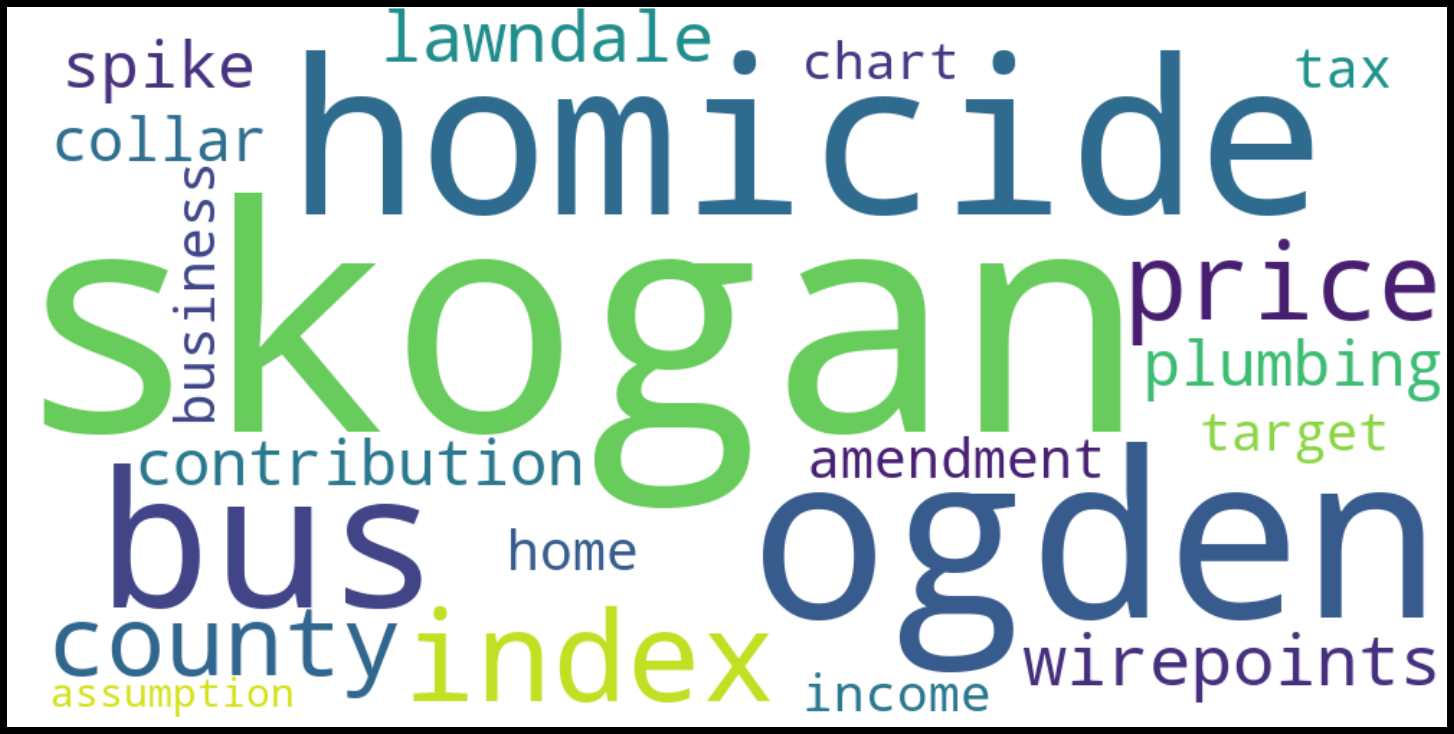

In [42]:
wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(entities_dic)
# wordcloud_obj.generate(entities_str)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

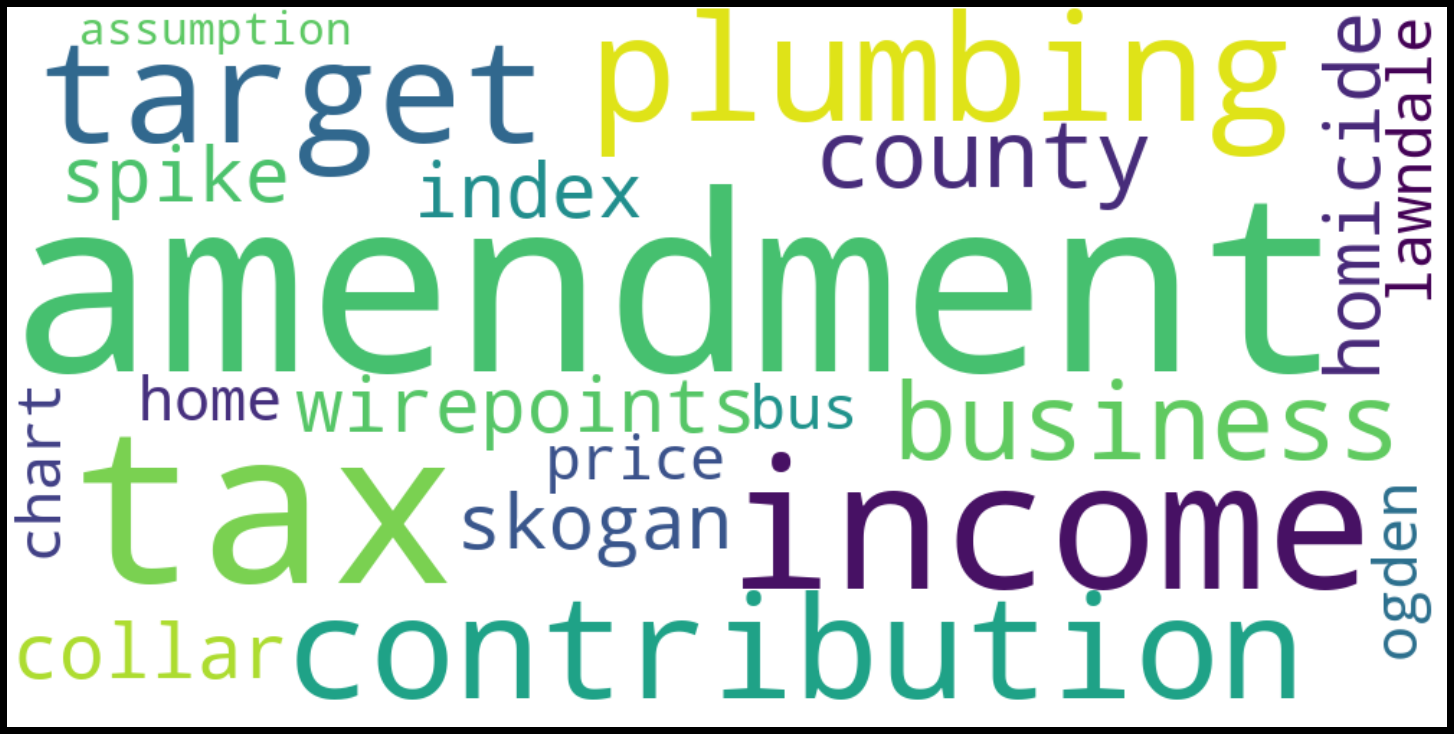

In [43]:
wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

# wordcloud_obj.generate_from_frequencies(entities_dic)
wordcloud_obj.generate(entities_str)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [44]:
# Extract keywords to get a better idea

from rake_nltk import Rake

In [45]:
r = Rake()

def rake_implement(x,r):
    r.extract_keywords_from_text(x) 
    return r.get_ranked_phrases()

In [46]:
df3['rake_phrases'] = df3['text_clean'].apply(lambda x: rake_implement(x,r)).apply(', '.join)

C:\Users\zjx04\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df3[['text','rake_phrases']].head()

,text,rake_phrases
39,Illinois Governor JB Pritzker speaks at the Il...,corporate tax rate currently would rise corpor...
40,Small businesses are the heart of our neighbor...,really get initial tax hike immediately affect...
43,Sept. 18-- CHICAGO-Before Illinois voters cons...,corporate tax rate currently would rise corpor...
45,I will be paying more for the products I need ...,really get initial tax hike immediately affect...
53,"Sangamon saw its population decrease by 2,419,...",sangamon saw population decrease percent last ...


In [53]:
pd.set_option('display.max_colwidth', 300)

In [54]:
df3[['text', 'rake_phrases']][df3['rake_phrases'].str.contains("tax", na=False)].head(10)

,text,rake_phrases
39,"Illinois Governor JB Pritzker speaks at the Illinois State Capitol on May 20, 2020, in Springfield, Illinois. (Erin Hooley/Chicago Tribune)\nBefore Illinois voters consider any candidate on the Nov. 3 ballot — the presidential contenders, a member of Congress, a state lawmaker or a local judge —...",corporate tax rate currently would rise corporation also pay personal property replacement tax basically added onto income tax liabilitypritzkers office amendment supporter estimated state million tax filer would pay amount le pay graduatedrate system increase revenue would paid taxpayer bring m...
40,"Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plumbing , a small business in the western suburbs. I’m not a millionaire, nor am I a billionaire. Far ...",really get initial tax hike immediately affect small business owner increase tax rate large corporation really real tax relief working poor middleclass family fact le per month someone making year amendment give big foot springfield politician step small business like mine diminish opportunity u...
43,"Sept. 18-- CHICAGO-Before Illinois voters consider any candidate on the Nov. 3 ballot-the presidential contenders, a member of Congress, a state lawmaker or a local judge-they will be asked to cast a simple yes or no vote on what could become the biggest change in state taxation in decades.\nThe...",corporate tax rate currently would rise corporation also pay personal property replacement tax basically added onto income tax liabilitypritzkers office amendment supporter estimated state million tax filer would pay amount le pay graduatedrate system increase revenue would paid taxpayer bring m...
45,"I will be paying more for the products I need for my plumbing company. I don’t want to be forced to make up the difference by cutting wages or even jobs. Sep 18, 2020, 4:01pm CDT Share this story Gov. J.B. Pritzker is pushing a proposed constitutional amendement on the Nov. 3 that would allow a ...",really get initial tax hike immediately affect small business owner increase tax rate large corporation really real tax relief working poor middleclass family fact le per month someone making year amendment give big foot springfield politician step small business like mine diminish opportunity u...
53,"Sangamon saw its population decrease by 2,419, or 1.2 percent, over the last decade, according to a new analysis from Wirepoints.org that is based on U.S. Census Bureau data.\nSangamon recorded the 22nd largest loss among Illinois’ 102 counties during the years 2010 to 2018, Wirepoints reported....",sangamon saw population decrease percent last decade according new analysis wirepointsorg based u census bureau datasangamon recorded nd largest loss among illinois county year wirepoints reported county population statewide nine county gained resident time period illinois lost people time state...
59,"Home price growth stalled last fall in the Chicago area.\nThe region’s single-family home values grew by 0.4 percent in November from a year earlier, according to the S&P CoreLogic Case-Shiller Indices released this morning. It was the third straight month of growth so slender it’s essentially f...",cause homebuyers curtail price pay order keep total cost homeownership growing fast lack economic boom like tech business boosted home value place like san francisco seattlenote index lag behind market report illinois realtor last week released data showing big increase home price december likel...
71,"Illinois Is Not Losing Its Highly Taxed Residents The state’s population is shrinking — but it’s also getting wealthier. By Edward McClelland Launch gallery Cairo, Illinois, which has seen its population drop from 15,000 at its peak in the 1920s to roughly 2,000 today Photo: Seth Perlman/AP\nIll...",reason according illinois policy institute wal

In [55]:
df3[['text', 'rake_phrases']][df3['rake_phrases'].str.contains("business", na=False)].head(10)

,text,rake_phrases
39,"Illinois Governor JB Pritzker speaks at the Illinois State Capitol on May 20, 2020, in Springfield, Illinois. (Erin Hooley/Chicago Tribune)\nBefore Illinois voters consider any candidate on the Nov. 3 ballot — the presidential contenders, a member of Congress, a state lawmaker or a local judge —...",corporate tax rate currently would rise corporation also pay personal property replacement tax basically added onto income tax liabilitypritzkers office amendment supporter estimated state million tax filer would pay amount le pay graduatedrate system increase revenue would paid taxpayer bring m...
40,"Small businesses are the heart of our neighborhoods. Jobs that are created by small businesses are what keep our communities thriving. My name is Chris Plywacz and I am the proud owner of Reeg Plumbing , a small business in the western suburbs. I’m not a millionaire, nor am I a billionaire. Far ...",really get initial tax hike immediately affect small business owner increase tax rate large corporation really real tax relief working poor middleclass family fact le per month someone making year amendment give big foot springfield politician step small business like mine diminish opportunity u...
43,"Sept. 18-- CHICAGO-Before Illinois voters consider any candidate on the Nov. 3 ballot-the presidential contenders, a member of Congress, a state lawmaker or a local judge-they will be asked to cast a simple yes or no vote on what could become the biggest change in state taxation in decades.\nThe...",corporate tax rate currently would rise corporation also pay personal property replacement tax basically added onto income tax liabilitypritzkers office amendment supporter estimated state million tax filer would pay amount le pay graduatedrate system increase revenue would paid taxpayer bring m...
45,"I will be paying more for the products I need for my plumbing company. I don’t want to be forced to make up the difference by cutting wages or even jobs. Sep 18, 2020, 4:01pm CDT Share this story Gov. J.B. Pritzker is pushing a proposed constitutional amendement on the Nov. 3 that would allow a ...",really get initial tax hike immediately affect small business owner increase tax rate large corporation really real tax relief working poor middleclass family fact le per month someone making year amendment give big foot springfield politician step small business like mine diminish opportunity u...
59,"Home price growth stalled last fall in the Chicago area.\nThe region’s single-family home values grew by 0.4 percent in November from a year earlier, according to the S&P CoreLogic Case-Shiller Indices released this morning. It was the third straight month of growth so slender it’s essentially f...",cause homebuyers curtail price pay order keep total cost homeownership growing fast lack economic boom like tech business boosted home value place like san francisco seattlenote index lag behind market report illinois realtor last week released data showing big increase home price december likel...
67,"These are selected by the writer and confirmed by the editor Original Reporting – + This article contains new, firsthand information uncovered by its reporter(s). This includes directly interviewing sources and research / analysis of primary source documents. On the Ground – + Indicates that a N...",recently scott invited cta head dorval carter jr chicago transit board chairman terry peterson visit several place lawndale seeing renewed investment ogden common mixeduse commercial developmenton ridealong go ogden broached conversation reinstituting bus line scott saidafter meeting transit off...
72,"The last issue of Hoy newspaper at a corner news box in Chicago. Photo by Elio Leturia, Special to Borderzine.com\nBy Hallie Newnam, Special to Borderzine.com\nCHICAGO – After 16 years, Hoy—the Spanish-language newspaper of the Tribune Publishing Company—has shut down.\nIn mid-November, the Trib...",tweeted ella lee reporter editor depaulia stud

In [139]:
df3[['text', 'rake_phrases']][df3['rake_phrases'].str.contains("stay", na=False)].head(10)

,text,rake_phrases
67,"These are selected by the writer and confirmed by the editor Original Reporting – + This article contains new, firsthand information uncovered by its reporter(s). This includes directly interviewing sources and research / analysis of primary source documents. On the Ground – + Indicates that a N...",recently scott invited cta head dorval carter jr chicago transit board chairman terry peterson visit several place lawndale seeing renewed investment ogden common mixeduse commercial developmenton ridealong go ogden broached conversation reinstituting bus line scott saidafter meeting transit off...
69,"Authored by Elizabeth Bauer via Forbes.com,\nI’ve said it before: Illinois cannot continue kicking the can on its pensions. I’ve said repeatedly (and fellow soapbox-stander Adam Schuster repeated the message in the Chicago Tribune last week ) that the state’s spending on pensions is costly, not ...",well antipob especially respect anyone promotes pension obligation bond form refinancing whollyrealistic discount rate scenario barely budget present funded status max chart three effect unfunded pension liability target bad lucknote funded status two lowreturn scenario similar diverge term abso...
70,"Authored by Elizabeth Bauer via Forbes.com,\nI’ve said it before: Illinois cannot continue kicking the can on its pensions. I’ve said repeatedly (and fellow soapbox-stander Adam Schuster repeated the message in the Chicago Tribune last week ) that the state’s spending on pensions is costly, not ...",well antipob especially respect anyone promotes pension obligation bond form refinancing whollyrealistic discount rate scenario barely budget present funded status max chart three effect unfunded pension liability target bad lucknote funded status two lowreturn scenario similar diverge term abso...
72,"The last issue of Hoy newspaper at a corner news box in Chicago. Photo by Elio Leturia, Special to Borderzine.com\nBy Hallie Newnam, Special to Borderzine.com\nCHICAGO – After 16 years, Hoy—the Spanish-language newspaper of the Tribune Publishing Company—has shut down.\nIn mid-November, the Trib...",tweeted ella lee reporter editor depaulia student news site depaul university chicagohoys newsroom also experiencing similar feeling chicago tribune spokesman tilden katz assured anticipate providing affected employee opportunity take open position inside companythe decision shut hoy received ba...
73,"I’ve said it before: Illinois cannot continue kicking the can on its pensions. I’ve said repeatedly (and fellow soapbox-stander Adam Schuster repeated the message in the Chicago Tribune last week ) that the state’s spending on pensions is costly, not only in terms of dollar amounts spent — over ...",well antipob especially respect anyone promotes pension obligation bond form refinancing whollyrealistic discount rate scenario barely budget present funded status max chart three effect unfunded pension liability target bad luckillinois trs unfunding projectionown work note funded status two lo...
229,"Pritzker’s Executive Order Strengthening the State’s Commitment to Ending the Opioid Epidemic Puts Illinois on the Right Path\nJanuary 27, 2020 – Today marks a crucial step in the fight to save lives and help Illinoisans struggling with opioids to achieve recovery, as Governor JB Pritzker has si...",heartland alliance belief measure put forth order focus racial social inequity help state eventually end crisisillinois taken step mitigate opioid overdose epidemic clear effort task overdose death reached proving midst worst public health crisis generation worse gun violence worse peak hivaids ...
263,"From The Journal Times.com :\nAdam Rogan\nRACINE — Shana Salter and her family took a “little vacation” to Racine this week. They live in Chicago and have been feeling cooped up for the last two months. They had no connection to Racine before, but found a place to stay for a few days and escape ...",came weekslong hiatus caused nation severely

In [137]:
phrase = df3['rake_phrases'].values
phrase_clean = [doc.split() for doc in phrase]  
phrase_string = list(' '.join(i) for i in phrase_clean)

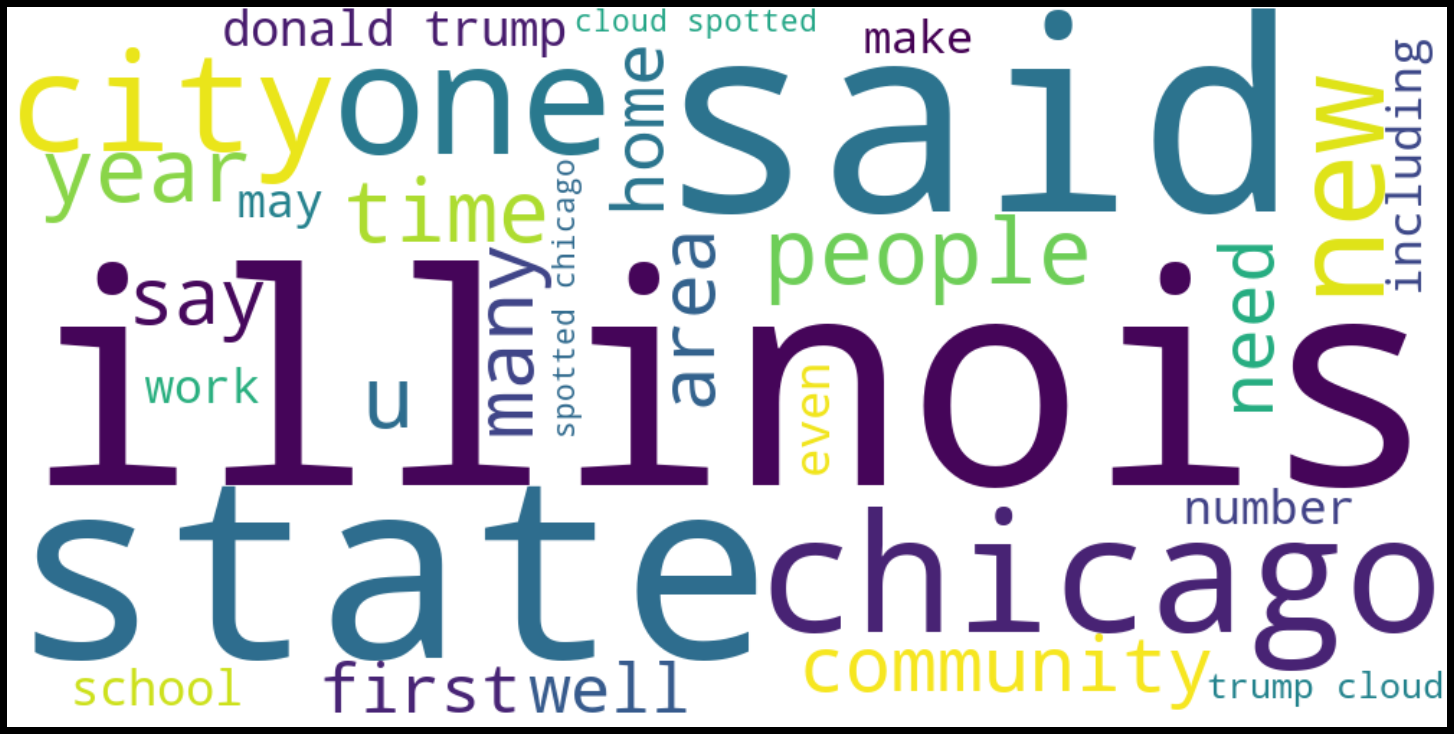

In [138]:
wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate(' '.join(phrase_string))

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [100]:
# try dictionary based sentiment anlaysis but got no meaningful output

text_list = df3['text_clean'].tolist()
# text_list = df4['text_clean'].tolist()

In [140]:
pos_add = ['stayed', 'move', 'grow', 'stay', 'good']

neg_add = ['left', 'decline', 'loss', 'leave', 'bad']

import re

sentiment_scores=[]
for x in text_list:
    sentiment_score=0
    word=x.split(' ')
    for w in word:
        if word in pos_add:
            sentiment_score=sentiment_score+1
        if word in neg_add:
            sentiment_score=sentiment_score-1
    sentiment_scores.append(sentiment_score/len(word))

text_sentiment=zip(text_list,sentiment_scores)

In [141]:
column_names = ["Text", "Sentiment_Score"]
sentiment_results = [text_list, sentiment_scores]
results_dict = dict(zip(column_names,sentiment_results))
all_df = pd.DataFrame.from_dict(results_dict, orient='columns')
all_df = all_df[column_names] 

In [142]:
sent_list = []

for row in all_df['Sentiment_Score']:
    if row > 0:
        sent_list.append('Positive')
    elif row < 0:
        sent_list.append('Negative')
    else:
        sent_list.append('Neutral')

# Create a column from the list
all_df['Sentiment_Label'] = sent_list

In [143]:
all_df[(all_df['Sentiment_Score'] < 0) | (all_df['Sentiment_Score'] > 0)]

,Text,Sentiment_Score,Sentiment_Label


In [95]:
# Topic Model - LDA

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore

In [96]:
text = df3['text_clean'].values
text[0]
text_clean = [doc.split() for doc in text]  

In [97]:
dictionary = corpora.Dictionary(text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean]

In [98]:
Lda = gensim.models.ldamodel.LdaModel

In [99]:
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=10), sep='\n')

(0, '0.006*"project" + 0.006*"pollinator" + 0.004*"community" + 0.004*"also" + 0.004*"mexican" + 0.004*"park" + 0.004*"chicago" + 0.004*"one" + 0.003*"people" + 0.003*"habitat"')
(1, '0.015*"said" + 0.005*"state" + 0.005*"people" + 0.005*"illinois" + 0.005*"one" + 0.005*"white" + 0.004*"year" + 0.004*"chicago" + 0.004*"black" + 0.004*"school"')
(2, '0.020*"chicago" + 0.010*"city" + 0.006*"home" + 0.005*"year" + 0.005*"new" + 0.005*"market" + 0.004*"said" + 0.004*"area" + 0.004*"also" + 0.004*"food"')
(3, '0.028*"illinois" + 0.023*"state" + 0.016*"population" + 0.015*"tax" + 0.010*"county" + 0.010*"people" + 0.008*"year" + 0.007*"new" + 0.007*"income" + 0.006*"loss"')
(4, '0.010*"voter" + 0.007*"said" + 0.006*"office" + 0.005*"post" + 0.004*"school" + 0.004*"would" + 0.004*"state" + 0.004*"community" + 0.004*"sander" + 0.004*"service"')
(5, '0.008*"illinois" + 0.004*"state" + 0.004*"may" + 0.003*"year" + 0.003*"new" + 0.003*"b" + 0.003*"disease" + 0.003*"one" + 0.003*"water" + 0.003*"u"

In [105]:
# Find context of keywords

from nltk.text import Text
text_string = list(' '.join(i) for i in text_clean)

In [106]:
text_clean[0:2]

[['illinois',
  'governor',
  'jb',
  'pritzker',
  'speaks',
  'illinois',
  'state',
  'capitol',
  'may',
  'springfield',
  'illinois',
  'erin',
  'hooleychicago',
  'tribunebefore',
  'illinois',
  'voter',
  'consider',
  'candidate',
  'nov',
  'ballot',
  'presidential',
  'contender',
  'member',
  'congress',
  'state',
  'lawmaker',
  'local',
  'judge',
  'asked',
  'cast',
  'simple',
  'yes',
  'vote',
  'could',
  'become',
  'biggest',
  'change',
  'state',
  'taxation',
  'four',
  'decadesmore',
  'candidate',
  'voted',
  'on',
  'proposed',
  'graduatedrate',
  'tax',
  'amendment',
  'represents',
  'could',
  'one',
  'fundamental',
  'longlasting',
  'change',
  'state',
  'government',
  'illinois',
  'functionssupporters',
  'contend',
  'graduatedrate',
  'system',
  'fair',
  'way',
  'shift',
  'tax',
  'burden',
  'generate',
  'money',
  'help',
  'end',
  'illinois',
  'longterm',
  'financial',
  'structural',
  'imbalance',
  'opponent',
  'contend',


In [108]:
text_file = open("sample.txt", "w")
n = text_file.write(str(text_string))
text_file.close()

In [109]:
textList = Text(nltk.corpus.gutenberg.words("C:\\Users\\zjx04\\Jupython_WD\\NLP\\sample.txt"))

In [110]:
textList.concordance("population")

Displaying 25 of 2540 matches:
e illinois seen six straight year population decline directly affect blue coll
e illinois seen six straight year population decline directly affect blue coll
z reeg plumbing ', ' sangamon saw population decrease percent last decade acco
y year wirepoints reported county population statewide nine county gained resi
 virginia connecticut vermont saw population contract since illinois total pop
ion contract since illinois total population declined time period study said w
 said wirepoints attributed state population drop high tax rate declining home
sdownstate county sustained worst population loss per caput since region lost 
ollar county dupage kane recorded population gain making region growth area st
umerically cook suffered greatest population loss time period examinedillinois
me period examinedillinois county population change county ', ' number people 
ghborhood chicago declining black population high concentration black individu
and problem acute tar

In [111]:
textList.concordance('decline')

Displaying 25 of 680 matches:
s seen six straight year population decline directly affect blue collar job lik
s seen six straight year population decline directly affect blue collar job lik
olence chicago skogan said dramatic decline homicide past three year result sha
 increase violence there three year decline first year enormous spike skogan sa
 ability chicago police solve crime decline public support police increase size
 pensionable payroll number teacher decline time line number resident thats pre
 pensionable payroll number teacher decline time line number resident thats pre
eclined according data illinois saw decline household earning le year earning i
 pensionable payroll number teacher decline time line number resident thats pre
ple six consecutive year population decline leading move illinois prime working
 leave state seen steady population decline past five year flat tax percentage 
 leave state seen steady population decline past five year flat tax percentage 
itical cla

In [112]:
textList.concordance('loss')

Displaying 25 of 986 matches:
go tribunepritzker estimated revenue loss billion budget year next helped keep
fect covidpritzker estimated revenue loss billion budget year next helped keep
eau datasangamon recorded nd largest loss among illinois county year wirepoint
te county sustained worst population loss per caput since region lost resident
ly cook suffered greatest population loss time period examinedillinois county 
y reason chicago slowdown population loss slows demand home decreasing need bi
ssembled data city showed population loss lawndale stopped even reversed sligh
stern state tribune wrote last month loss opportunity high tax frustration fis
t illinois notable demographic shift loss wealthy highly taxed resident black 
 alone driving much state population loss though metro area continues draw bla
trated confused newspaper abrupt end loss chicago hoy cover city latinx commun
 newsroomonly time tell try make hoy loss future negociosnow publisher clement
attract investment dec

In [113]:
textList.concordance('business')

Displaying 25 of 1022 matches:
n cash billionaire organized labor business groupsthe proposed amendment signa
up disclose funding along illinois business alliance illinois rising actionthe
ibuneseptember pm share ', ' small business heart neighborhood job created sma
art neighborhood job created small business keep community thriving name chris
cz proud owner reeg plumbing small business western suburb im millionaire bill
ed help obama administration small business administration loan program proud 
llot nov potential negative effect business employee democrat know amendment p
ty tax state already losing people business high tax burden constitutional ame
utional amendment pass even people business job leave state important note ill
 tax hike immediately affect small business owner increase tax rate large corp
 springfield politician step small business like mine diminish opportunity u c
portunity u create job even expand business larger employer provide good servi
ant hear fortunate en

In [115]:
textList.concordance('resident')

Displaying 25 of 1011 matches:
ation statewide nine county gained resident time period illinois lost people t
n loss per caput since region lost resident five collar county dupage kane rec
ording studymany new collar county resident relocated cook county wirepoints r
 indicatorsnorth lawndale lawndale resident soon new transit option make quick
transit option make quicker easier resident get work school downtownthe new bu
ogden avenue also allowed lawndale resident far west pulaski road get downtown
ionthe pilot program come lawndale resident campaigned year get ogden bus rout
 supporting local business helping resident connect employment opportunity par
dvocate bus route rochelle jackson resident used take ogden bus work day route
 take ogden bus work day route cut resident community organization north lawnd
unity leader cta official lawndale resident could make case reinstating no bus
ki pink line stationjackson fellow resident valerie leonard assembled data cit
ed slightly modest in

In [144]:
textList.concordance('stay')

Displaying 25 of 211 matches:
estment west side business struggled stay afloat many shop along ogden avenue 
learn navigate adoptive country well stay touch family friend back home said h
connection racine before found place stay day escape confines illinois stayath
 lowerincome resident whose decision stay may well help stem outgoing tide ill
every saturday noonfurther youngster stay classroom day hour longer student u 
idnt join exodus chose choice rather stay behind large number folk moving spel
 year alone wide range new tax hit u stay fuel sale tax doubled vehicle licens
etal detector significant other able stay together instead separated sent diff
 homeless person center hed intended stay night say left minute seen enough wi
ision business whether want relocate stay illinois cogfa chief clayton klenke 
iddle income resident whose decision stay may well help stem outgoing tide ill
ince firm believer well help get job stay job help eliminate barrier housing i
white family grappled 

In [145]:
text1 = df4['text_clean'].values
text1_clean = [doc.split() for doc in text1]  

In [146]:
text1_string = list(' '.join(i) for i in text1_clean)

In [147]:
text1_file = open("sample1.txt", "w")
n = text1_file.write(str(text1_string))
text1_file.close()

In [148]:
textList1 = Text(nltk.corpus.gutenberg.words("C:\\Users\\zjx04\\Jupython_WD\\NLP\\sample1.txt"))

In [149]:
textList1.concordance('stay')

Displaying 10 of 10 matches:
ewsletter ', ' register free article stay logged skip survey log sign featured
ax become growing concern illinoisan stay person leavespopulation decline spec
richs said people good job here want stay clear high property tax something th
 people graduating college incentive stay illinois goodpaying job part equatio
richs said people good job here want stay clear high property tax something th
 people graduating college incentive stay illinois goodpaying job part equatio
ity democrat dont encourage resident stay illinoisso care electoral college go
ity democrat dont encourage resident stay illinois care electoral college goin
s think people friendly thats helped stay tooso stick around well several reas
 primary causation allows government stay back industry brady addedwe want tak


In [150]:
textList1.concordance('decline')

Displaying 25 of 91 matches:
g ', ' even illinois see population decline study university illinois chicago s
kely reason farreaching devastating decline include intensified agricultural pr
nicotinoid insecticide major factor decline said madhu khanna distinguished pro
county increase average contributed decline population grassland bird insectivo
 associated decrease grassland bird decline nongrassland bird insectivorous bir
 relatively large effect population decline important bird impact grow timeacco
cultural land also contributed bird decline result showed small negative effect
ro area shrinking manufacturing job decline pmthe rockford city hall rockford i
d percent smaller since decatur led decline shrinking percent according review 
d percent smaller since decatur led decline shrinking percent according review 
ro area shrinking manufacturing job decline normal il usa wwwcitiescom june pmt
d percent smaller since decatur led decline shrinking percent according review 
et largest 